In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [3]:
dataset_raw = pd.read_excel('insurance3r2_3000.xlsx')

In [5]:
dataset_raw.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'charges',
       'insuranceclaim', 'region'],
      dtype='object')

In [7]:
df=dataset_raw.drop(['insuranceclaim', 'region'],axis=1)

In [9]:
df

,age,sex,bmi,steps,children,smoker,charges
0,19,0,27.900,3009,0,1,16884.92400
1,18,1,33.770,3008,1,0,1725.55230
2,28,1,33.000,3009,3,0,4449.46200
3,33,1,22.705,10009,0,0,21984.47061
4,32,1,28.880,8010,0,0,3866.85520
...,...,...,...,...,...,...,...
3094,64,1,39.160,3011,1,0,14535.28040
3095,64,0,25.980,5007,0,1,28986.46920
3096,63,1,34.880,4016,0,1,46793.26120
3097,60,1,33.860,4017,0,1,46466.10840


In [11]:
df.corr()['charges'].drop('charges')

age         0.303853
sex         0.065954
bmi         0.196008
steps      -0.302431
children    0.064720
smoker      0.787092
Name: charges, dtype: float64

Text(0, 0.5, 'Coefficients')

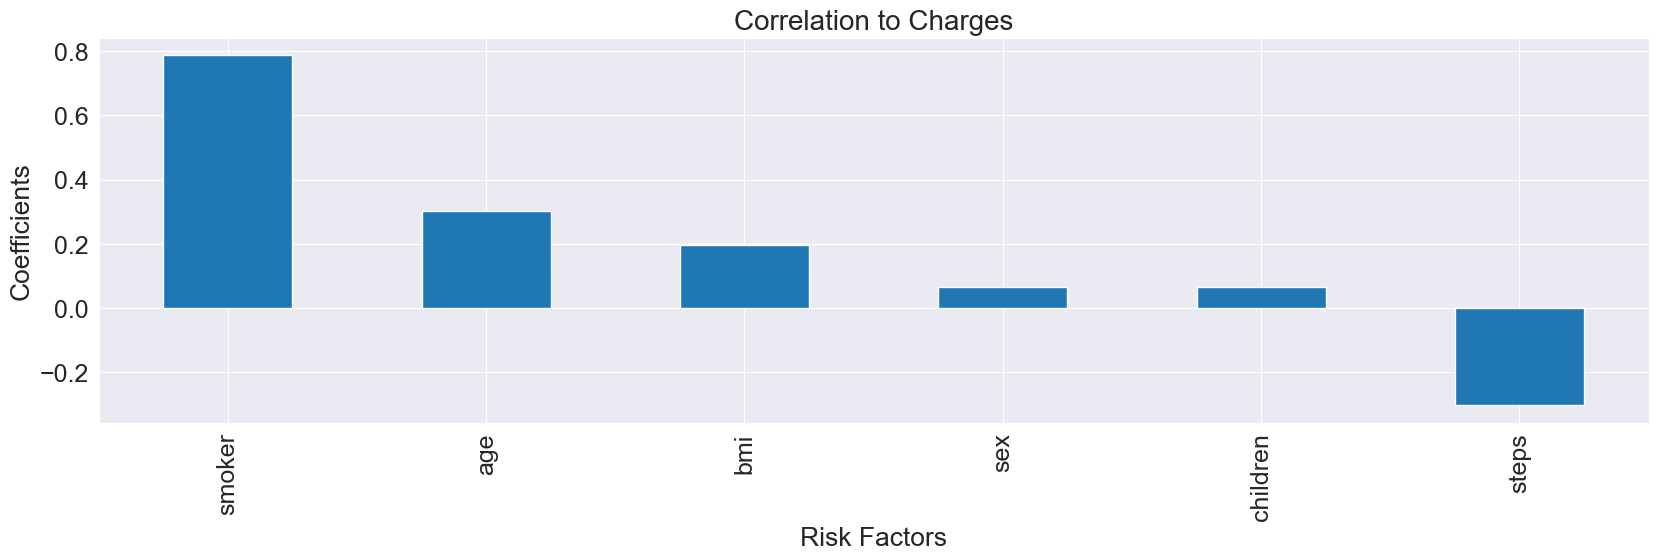

In [13]:
df.corr()['charges'].drop('charges').sort_values(ascending=False).plot(kind='bar',  fontsize=18)
plt.title('Correlation to Charges', fontsize=20)
plt.xlabel('Risk Factors', fontsize=19)
plt.ylabel('Coefficients', fontsize=19)

<Axes: >

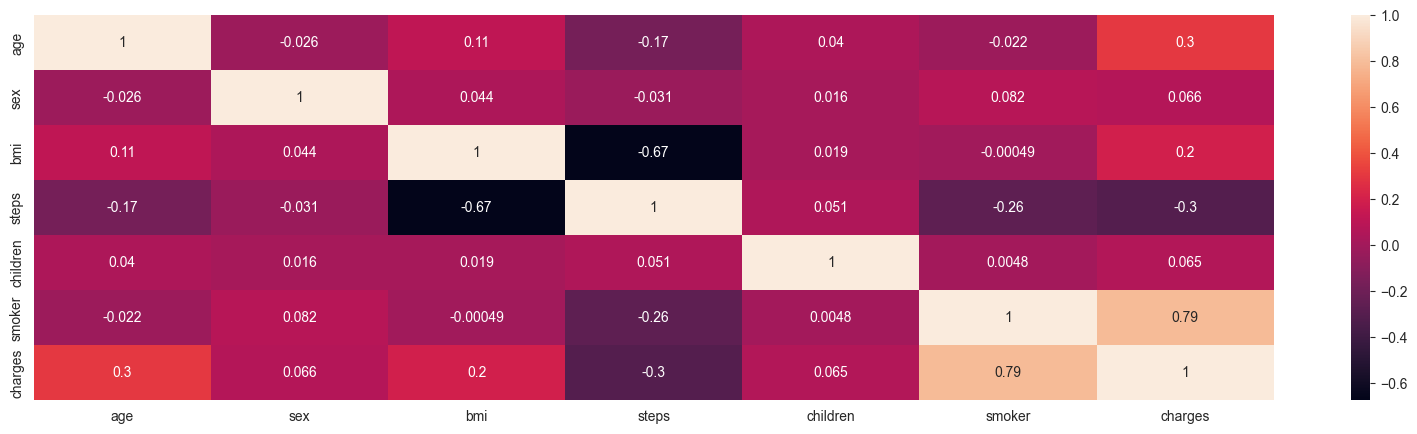

In [15]:
sns.heatmap(df.corr(), annot=True)

In [19]:
#Regression Analysis

independent_variables = df.drop(columns=['charges'])
dependent_variable = df['charges']

independent_variables = sm.add_constant(independent_variables)

regression_model = sm.OLS(dependent_variable,independent_variables).fit()

regression_model.summary()

#remind to do scatter plot of predicted vs. actual charges

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1629.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:29:43   Log-Likelihood:                -31331.
No. Observations:                3099   AIC:                         6.268e+04
Df Residuals:                    3092   BIC:                         6.272e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.199e+04   1105.998    -19.884      0.000   -2.42e+04   -1.98e+04
age          270.7143      7.708     35.120      0.000     255.600     285.828
sex          -32.1098    215.133     -0.149      0.881    -453.927     389.708
bmi          505.2363     24.626     20.516      0.000     456.951     553.521
steps          0.6907      0.064     10.748      0.000       0.565       0.817
children     366.7702     89.424      4.101      0.000     191.434     542.107
smoker      2.487e+04    284.526     87.409      0.000    2.43e+04    2.54e+04
==============================================================================
Omnibus:                      695.323   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1733.144
Skew:                           1.218   Prob(JB):                         0.00
Kurtosis:                       5.737   Cond. No.                     6.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

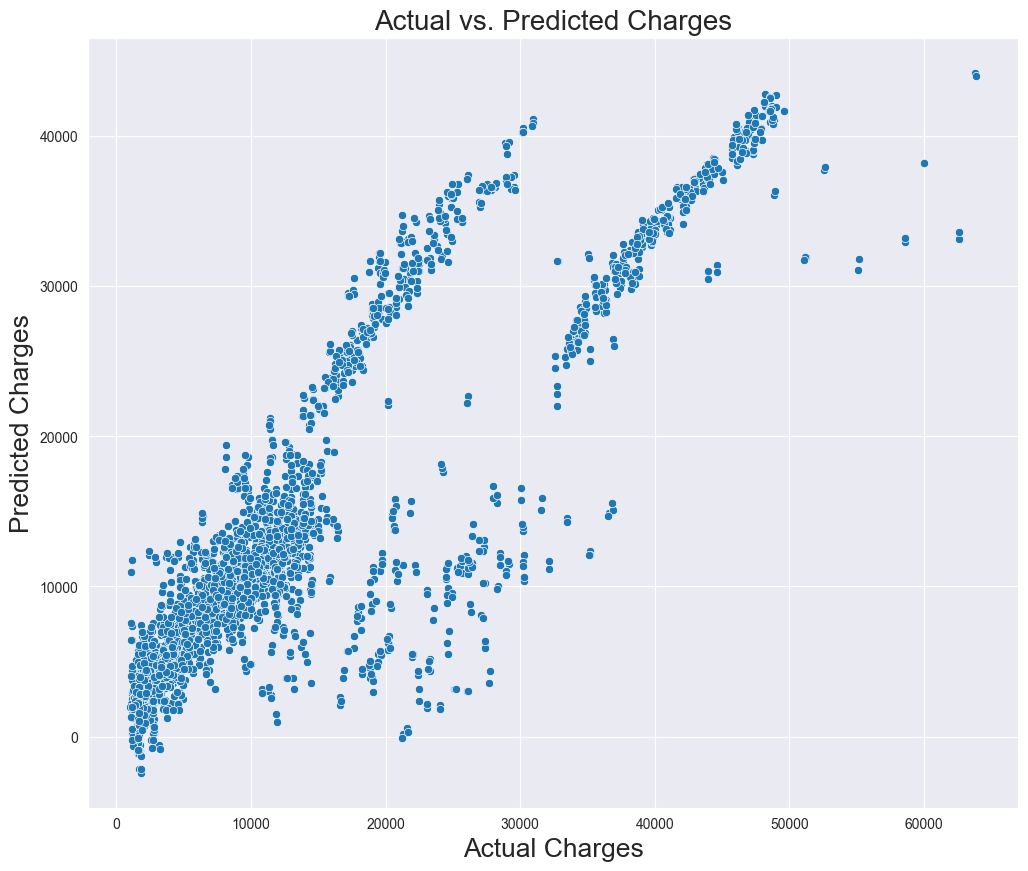

In [21]:
# Generate the predicted values
y_pred = regression_model.predict(independent_variables)

# Create a scatterplot comparing actual charges to predicted charges
plt.figure(figsize=(12,10))
sns.scatterplot(x=dependent_variable, y=y_pred)

# Add labels and title
plt.xlabel("Actual Charges", fontsize=19)
plt.ylabel("Predicted Charges", fontsize=19)
plt.title("Actual vs. Predicted Charges", fontsize=20)

# Show the plot
plt.show()

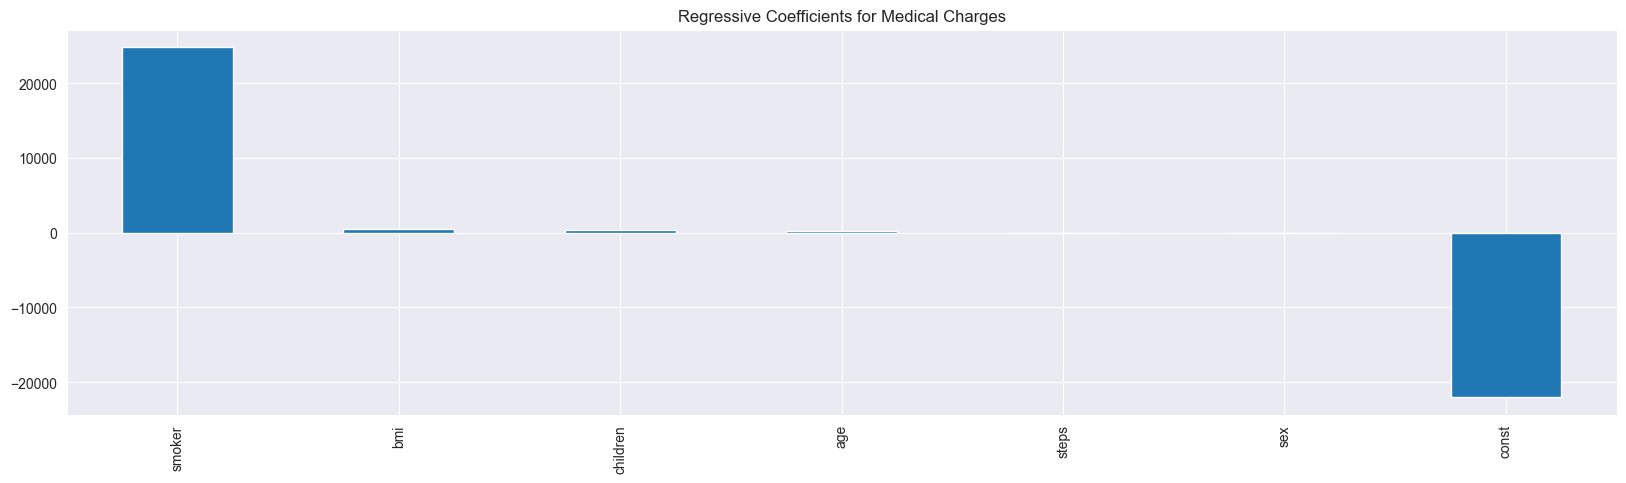

In [23]:
#Coefficient Analysis

regression_model.params.sort_values(ascending=False).plot(kind='bar', title='Regressive Coefficients for Medical Charges')
plt.show()